In [53]:
#!pip install scipy
import tensorflow as tf
import matplotlib.image as img
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
#from tensorflow.keras.preprocessing import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
#Image flow from directory, data image gen
#from skimage import io, color, filters
#from skimage.transform import resize, rotate
print(tf.__version__)
print(tf.test.gpu_device_name())
#!pip install tensorflow_datasets


2.3.1
/device:GPU:0


In [4]:
os.listdir('../data/meta/')

['meta']

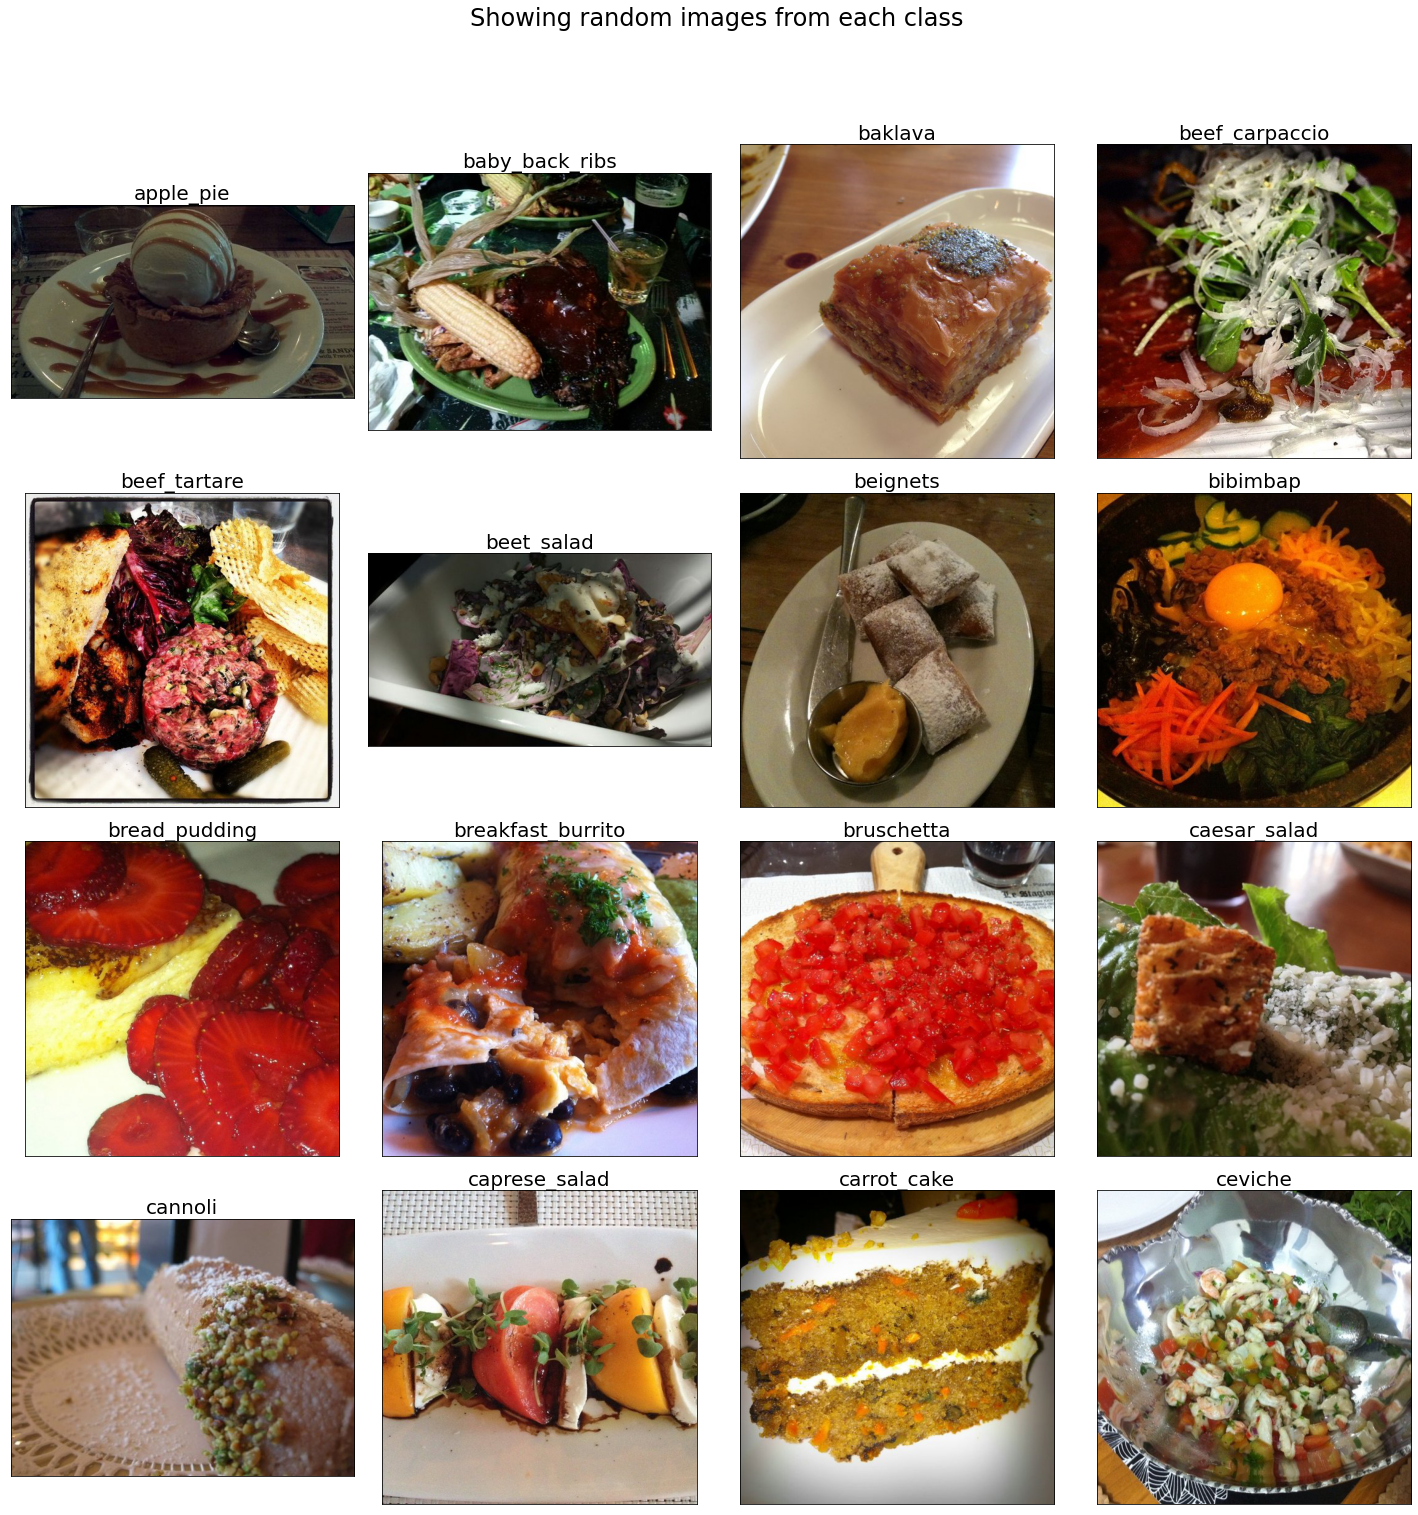

In [2]:
def show_all_images(ax,title,row,col):
    fig, ax = plt.subplots(row,col, figsize=(20,20))
    fig.suptitle(title,fontsize=24, y=1.05)
    data_loc = '../data/images/'
    accum = 0
    sorted_pics = sorted(os.listdir(data_loc))
    for i in range(row):
        for j in range(col):
            food_selected = sorted_pics
            food = food_selected[accum]
            accum +=1 

            # returns the list of all files 
            food_images = os.listdir(os.path.join(data_loc,food)) # joins the dir to food selected
            food_images_random = np.random.choice(food_images) # then choses a random image inside of it 
            img = plt.imread(os.path.join(data_loc,food,food_images_random)) # joins the dir to the random image selected
            # img returns matrix acutally 
            ax[i][j].imshow(img)
            ax[i][j].set_title(food, fontsize=20,pad=5)
    plt.setp(ax, xticks=[],yticks=[])
    plt.tight_layout()



show_all_images(10,'Showing random images from each class', 4,4)



# holdout set

In [88]:
sorted_pics = sorted(os.listdir(data_loc))
sorted_pics[1:].to_numpy()

AttributeError: 'list' object has no attribute 'to_numpy'

## Grayscaling 



Converting to grayscale allows us to do more things:

Simplify the classification to shape and lighting only
Maintain some semblance of sampling density (RGB features at 33px = 3267)


In [ ]:
def grayscale(file_location, count):

def show_all_images(ax,title,row,col, filter_):
    fig, ax = plt.subplots(row,col, figsize=(20,20))
    fig.suptitle(title,fontsize=24, y=1.05)
    data_loc = '../data/images/'
    accum = 0
    sorted_pics = sorted(os.listdir(data_loc))
    for i in range(row):
        for j in range(col):
            food_selected = sorted_pics
            food = food_selected[accum]
            accum +=1 

            # returns the list of all files 
            food_images = os.listdir(os.path.join(data_loc,food)) # joins the dir to food selected
            food_images_random = np.random.choice(food_images) # then choses a random image inside of it 
            img = plt.imread(os.path.join(data_loc,food,food_images_random)) # joins the dir to the random image selected
            # img returns matrix acutally 
            ax[i][j].imshow(img)
            ax[i][j].set_title(food, fontsize=20,pad=5)
    plt.setp(ax, xticks=[],yticks=[])
    plt.tight_layout()



show_all_images(10,'Showing random images from each class', 4,4,filter_)

In [11]:

def test_split(rootdir):
    root_dir = rootdir
    """
    # train dirs
    for food in os.listdir(os.path.join(root_dir,'images')):
        os.makedirs(root_dir +'/train/' + food)
    # test dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/test/" + food)
    # var dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/var/" + food)
    """
    food_names = os.listdir(os.path.join(root_dir,'images'))
    for food in food_names:
        currentCls = food
        src = os.path.join(root_dir,'images',currentCls) # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
    
        for name in train_FileNames:
            shutil.copy(name, root_dir+"/train/"+currentCls)

        for name in val_FileNames:
            shutil.copy(name, root_dir+"/var/"+currentCls)

        for name in test_FileNames:
            shutil.copy(name, root_dir+"/test/"+currentCls)
            
            

print(test_split('../data'))
    
    

Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images

In [14]:
os.read_txt('../data/meta/meta/classes.txt')

AttributeError: module 'os' has no attribute 'read_txt'

In [3]:
labels_all= '''apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spaghetti_bolognese
spaghetti_carbonara
spring_rolls
steak
strawberry_shortcake
sushi
tacos
takoyaki
tiramisu
tuna_tartare
waffles'''
user_words = labels_all
word_list = user_words.split()
user_words = []
for word in word_list:
    user_words.append(word)
user_words = " ".join(user_words)
class_labels = user_words.split()

In [19]:
# 
X = image_dataset_from_directory(
    '../data/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=class_labels,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)


Found 70700 files belonging to 101 classes.


Found 3500 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True


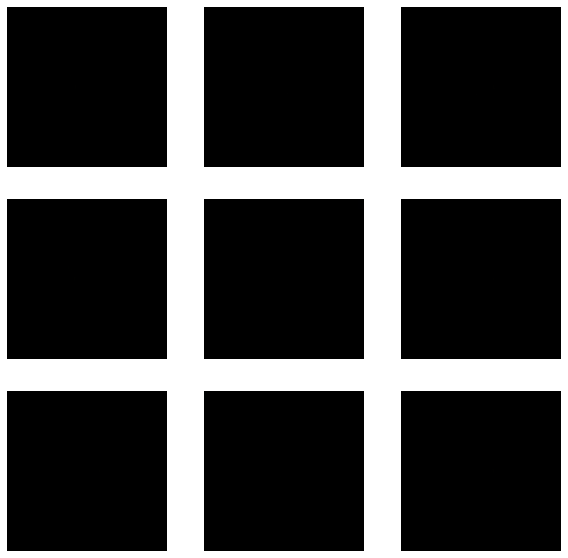

In [96]:
# making only 5 classes

# agumentations (rotation_range=90, rescale=1./255,rotation_range=90,height_shift_range=0.5,shear_range=0.1, zoom_range=0.1, horizontal_flip=True))

X5_train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range=0.2, zoom_range=0.2)
X5_test_datagen = ImageDataGenerator(rescale=1./255)
X5_var_datagen = ImageDataGenerator(rescale=1./255)

labels_5 = ['apple_pie','waffles','gnocchi','chocolate_mousse','baklava']

X5_train = X5_train_datagen.flow_from_directory(
    '../data/train_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

X5_test = X5_test_datagen.flow_from_directory(
    '../data/test_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
X5_var = X5_var_datagen.flow_from_directory(
    '../data/var_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)


# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         'data/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# validation_generator = test_datagen.flow_from_directory(
#         'data/validation',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# model.fit(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)

# example of vertical shift image augmentation
print('These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# load the image
img = load_img('../data/train_mini/waffles/1005755.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = X5_train_datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.title(label='These waffles have bee height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
for i in range(9):
    # define subplot
    pyplot.subplot( 330 +1 +i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.minorticks_off()
    pyplot.imshow(image)
    pyplot.axis('off')
    
# show the figure

pyplot.show()

In [4]:
class_names = X5_train.class_names
print(class_names)


AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

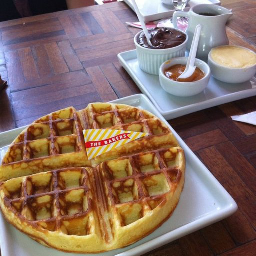

In [161]:

tf.keras.preprocessing.image.load_img(
    '../data/train/waffles/1005295.jpg', grayscale=False, color_mode="rgb", target_size=(256,256), interpolation="nearest"
)


In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in X5_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels)
    plt.axis("off")


AttributeError: 'DirectoryIterator' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

Tensorflow cnn


In [97]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [98]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [99]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True, monitor = 'val_loss') 
checkpoint_filepath = './CNN/my_5classmodel.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [100]:
# basic model

num_classes = 5
input_shape=[256,256,3]

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [101]:
history = model.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=50,
        validation_data=X5_var,
        validation_steps=700//32,callbacks=[checkpoint_cb])

Epoch 1/50
109/109 [==============================] - 50s 457ms/step - loss: 1.5377 - accuracy: 0.3198 - val_loss: 1.4296 - val_accuracy: 0.4152
Epoch 2/50
109/109 [==============================] - 50s 461ms/step - loss: 1.3603 - accuracy: 0.4242 - val_loss: 1.3325 - val_accuracy: 0.4673
Epoch 3/50
109/109 [==============================] - 50s 459ms/step - loss: 1.2874 - accuracy: 0.4706 - val_loss: 1.3726 - val_accuracy: 0.4688
Epoch 4/50
109/109 [==============================] - 48s 440ms/step - loss: 1.2458 - accuracy: 0.4957 - val_loss: 1.2725 - val_accuracy: 0.4613
Epoch 5/50
109/109 [==============================] - 49s 446ms/step - loss: 1.1951 - accuracy: 0.5161 - val_loss: 1.2957 - val_accuracy: 0.4613
Epoch 6/50
109/109 [==============================] - 49s 451ms/step - loss: 1.1443 - accuracy: 0.5421 - val_loss: 1.2870 - val_accuracy: 0.4747
Epoch 7/50
109/109 [==============================] - 49s 452ms/step - loss: 1.1125 - accuracy: 0.5568 - val_loss: 1.2412 - val_ac

KeyboardInterrupt: 

In [128]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(39)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'history' is not defined

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# plt.plot(model.history["accuracy"])
# plt.plot(history.history["val_accuracy"])
# plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
# plt.title("model accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("Epoch")
# plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
# plt.show()

 
X5_test.reset()
predIdxs = history.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))



NameError: name 'history' is not defined

In [108]:
score = model.evaluate(X5_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

Test score: 1.873914122581482
Test accuracy: 0.5669642686843872


In [131]:
name = keras.models.load_model('./CNN/my_5classmodel.h5')
predictions_ = name.predict(X5_test)


In [115]:
# Create a new model instance
def create_modelw():
    num_classes = 101
    input_shape=[256,256,3]

    model = Sequential([
      layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
    ])


    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

modelw = create_modelw()

# Load the previously saved weights
modelw.load_weights('./M')

# Re-evaluate the model
loss, acc = modelw.evaluate(X5_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


acc = modelw.history['accuracy']
val_acc = modelw.history['val_accuracy']

loss = modelw.history['loss']
val_loss = modelw.history['val_loss']

epochs_range = range(39)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


24/24 - 3s - loss: 1.6080 - accuracy: 0.5227
Restored model, accuracy: 52.27%


AttributeError: 'Sequential' object has no attribute 'keys'

In [127]:
print()
X5_test.reset()
predIdxs = modelw.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))


                  precision    recall  f1-score   support

       apple_pie       0.40      0.24      0.30       150
         waffles       0.47      0.64      0.54       150
         gnocchi       0.59      0.54      0.56       150
chocolate_mousse       0.65      0.61      0.63       150
         baklava       0.49      0.58      0.53       150

        accuracy                           0.52       750
       macro avg       0.52      0.52      0.51       750
    weighted avg       0.52      0.52      0.51       750



In [118]:
#!pip install pandas
from sklearn import metrics
import pandas as pd

 
#note in kera model.predict() will return predict probabilities
pred_prob =  modelw.predict(X5_test, verbose=0)
 
#preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
 
 
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


NameError: name 'ytest' is not defined

[[3 1 4]
 [1 3 0]
 [4 0 2]
 ...
 [4 3 0]
 [4 0 1]
 [4 0 2]]


(array([[ 90.,   0., 205.,   0.,   0., 138.,   0., 141.,   0., 176.],
        [182.,   0., 177.,   0.,   0., 139.,   0., 108.,   0., 144.],
        [248.,   0., 147.,   0.,   0., 143.,   0.,  92.,   0., 120.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 3 BarContainer objects>)

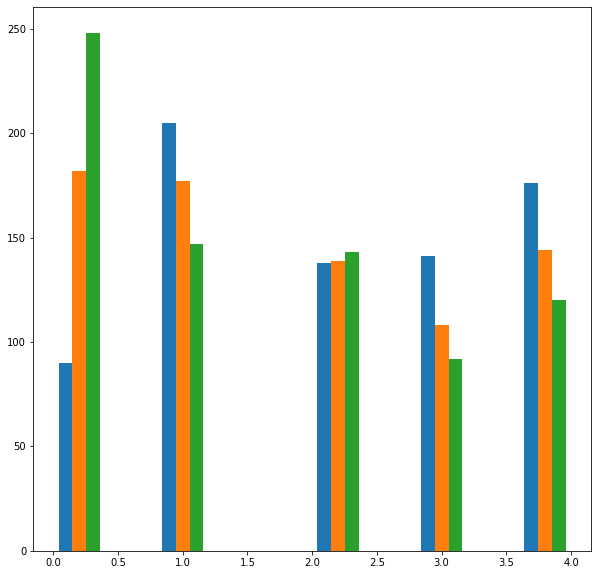

In [133]:
# top 3 of the predictions 
print(np.argsort(predictions_,axis=1)[:,-3:][:,::-1])

fig, ax = plt.subplots()
ax.hist(np.argsort(predictions_,axis=1)[:,-3:][:,::-1])

In [84]:

print(X5_test.class_indices)
X5_test.filepaths

{'apple_pie': 0, 'waffles': 1, 'gnocchi': 2, 'chocolate_mousse': 3, 'baklava': 4}


['../data/test_mini/apple_pie/1028787.jpg',
 '../data/test_mini/apple_pie/1047447.jpg',
 '../data/test_mini/apple_pie/1074942.jpg',
 '../data/test_mini/apple_pie/1174241.jpg',
 '../data/test_mini/apple_pie/1191665.jpg',
 '../data/test_mini/apple_pie/1230465.jpg',
 '../data/test_mini/apple_pie/1232311.jpg',
 '../data/test_mini/apple_pie/1269202.jpg',
 '../data/test_mini/apple_pie/1272958.jpg',
 '../data/test_mini/apple_pie/1284428.jpg',
 '../data/test_mini/apple_pie/129668.jpg',
 '../data/test_mini/apple_pie/1348788.jpg',
 '../data/test_mini/apple_pie/1391393.jpg',
 '../data/test_mini/apple_pie/1410907.jpg',
 '../data/test_mini/apple_pie/1420227.jpg',
 '../data/test_mini/apple_pie/1443243.jpg',
 '../data/test_mini/apple_pie/1444702.jpg',
 '../data/test_mini/apple_pie/1456028.jpg',
 '../data/test_mini/apple_pie/1503274.jpg',
 '../data/test_mini/apple_pie/1526484.jpg',
 '../data/test_mini/apple_pie/1550786.jpg',
 '../data/test_mini/apple_pie/1575505.jpg',
 '../data/test_mini/apple_pie/159

In [95]:
name.evaluate(X5_test)

24/24 [==============================] - 3s 126ms/step - loss: 1.5145 - accuracy: 0.3720


[1.514504075050354, 0.3720000088214874]

In [10]:
def define_model(kernel_size=(3,3), input_shape=[256,256,3], pool_size=2, nb_classes=5):
    model = Sequential() 
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    model.add(Conv2D(16, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape)) 
    model.add(Activation('relu')) 
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, prevent overfitting
    model.add(Flatten()) # necessary to flatten before going into conventional dense layer
    print('Model flattened out to ', model.output_shape)
    # now start a neural network
    model.add(Dense(64))
    model.add(Activation('relu')) #64 neurons in this layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) # zeros out some fraction of inputs, helps prevent overfitting
    model.add(Dense(nb_classes)) # (one for each class)
    model.add(Activation('softmax')) # softmax at end to pick between classes 0-3 KEEP
    # optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model_complex = define_model()



history = model_complex.fit(
        X5_train,
        steps_per_epoch=3500//100,
        epochs=50,
        validation_data=X5_var,
        validation_steps=750//100)
#callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb]

Model flattened out to  (None, 1048576)
Epoch 1/50
35/35 [==============================] - 17s 486ms/step - loss: 3.5794 - accuracy: 0.2036 - val_loss: 1.5249 - val_accuracy: 0.3304
Epoch 2/50
35/35 [==============================] - 17s 487ms/step - loss: 1.6126 - accuracy: 0.1873 - val_loss: 1.6130 - val_accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 18s 502ms/step - loss: 1.6095 - accuracy: 0.2080 - val_loss: 1.6092 - val_accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 17s 478ms/step - loss: 1.6094 - accuracy: 0.2107 - val_loss: 1.6091 - val_accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 17s 472ms/step - loss: 1.6093 - accuracy: 0.2145 - val_loss: 1.6137 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 16s 465ms/step - loss: 1.6089 - accuracy: 0.2255 - val_loss: 1.6294 - val_accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 17s 480ms/step - loss: 1.6099 

KeyboardInterrupt: 

In [119]:
model.predict(X_test)

array([[  3.8475807 ,   4.897648  ,  -4.315894  ,   0.90274805,
         -0.13423875],
       [  0.58202094,   1.6971517 , -10.274123  ,  10.806273  ,
         -7.843048  ],
       [  6.569815  ,  -5.134667  ,   2.018135  ,  -9.412751  ,
          2.9159515 ],
       [  0.5710216 ,   3.5076911 ,  -6.910876  ,   8.3371935 ,
         -2.2381692 ],
       [ -2.3135521 ,   2.1347976 ,  -7.758911  ,   5.0523915 ,
          4.2308226 ],
       [  0.8439602 ,  -2.449172  ,  -3.4623344 ,  -0.12673962,
         -0.23494437],
       [ -2.3474221 ,   1.6969135 ,   1.2013887 ,   5.6501865 ,
         -6.3909516 ],
       [ -4.925739  ,   1.1959693 ,   0.47939724,  13.275502  ,
         -8.464184  ],
       [  3.2976406 ,   6.651813  ,  -0.8770426 ,  -1.2776618 ,
          2.4572442 ],
       [ -3.7024739 ,   9.065071  ,   7.678484  ,  -1.9757082 ,
         -8.323101  ],
       [  0.963352  ,  -0.24618477,  -6.8823028 ,  10.545109  ,
         -6.920987  ],
       [  3.3906052 ,   9.925206  , -10.639

In [123]:

score = model.evaluate(X5_var, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

Test score: 1.873914122581482
Test accuracy: 0.5669642686843872


In [141]:
num_classes = 5
img_height = 256
img_width = 256
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation="softmax")])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 32)      

In [155]:

history = model.fit(
        X5_train,
        steps_per_epoch=110,
        epochs=20,
        validation_data=X5_var,
        validation_steps=22, 
        callbacks=[early_stopping_cb])

#,checkpoint_cb, tensorboard_cb

Epoch 1/20
110/110 [==============================] - 47s 430ms/step - loss: 1.3942 - accuracy: 0.5037 - val_loss: 1.4439 - val_accuracy: 0.4517
Epoch 2/20
110/110 [==============================] - 46s 422ms/step - loss: 1.3820 - accuracy: 0.5154 - val_loss: 1.4772 - val_accuracy: 0.4091
Epoch 3/20
110/110 [==============================] - 47s 423ms/step - loss: 1.3952 - accuracy: 0.4983 - val_loss: 1.4557 - val_accuracy: 0.4361
Epoch 4/20
110/110 [==============================] - 47s 423ms/step - loss: 1.3663 - accuracy: 0.5314 - val_loss: 1.4488 - val_accuracy: 0.4446
Epoch 5/20
110/110 [==============================] - 47s 428ms/step - loss: 1.3776 - accuracy: 0.5174 - val_loss: 1.4641 - val_accuracy: 0.4233
Epoch 6/20
110/110 [==============================] - 47s 428ms/step - loss: 1.3672 - accuracy: 0.5280 - val_loss: 1.4414 - val_accuracy: 0.4545
Epoch 7/20
110/110 [==============================] - 46s 420ms/step - loss: 1.3564 - accuracy: 0.5369 - val_loss: 1.4640 - val_ac

In [157]:
acc = model.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


TypeError: 'History' object is not subscriptable

In [ ]:
tensorboard dev upload --logdir \
    './my_logs'

In [ ]:
def define_model2(kernel_size=(3,3), input_shape=[384,384,3], pool_size=3, nb_classes=5):
    model = Sequential() # model is a linear stack of layers (don't change)
    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    model.add(Conv2D(16, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape)) #first conv. layer  KEEP
    model.add(Activation('relu')) # Activation specification necessary for Conv2D and Dense layers
    model.add(Conv2D(32, (kernel_size[0], kernel_size[1]), padding='same')) #2nd conv. layer KEEP
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape))
    model.add(Flatten()) # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)
    # now start a typical neural network
    model.add(Dense(128)) # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))
#     model.add(Dropout(0.1)) # zeros out some fraction of inputs, helps prevent overfitting
    model.add(Dense(nb_classes)) # 5 final nodes (one for each class)  KEEP
    model.add(Activation('softmax')) # softmax at end to pick between classes 0-3 KEEP
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model2 = define_model2()

#384,384

history2 = model2.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=15,
        validation_data=X5_var,
        validation_steps=700//32,
        callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

In [20]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
activation_20 (Activation)   (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 32)      4640      
_________________________________________________________________
activation_21 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 262144)           

In [9]:
def define_model3(kernel_size=(3,3), input_shape=[256,256,3], pool_size=4, nb_classes=5):
    model = Sequential() 
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    model.add(Conv2D(16, (kernel_size[0], kernel_size[1]),
                        padding='same', strides=1,
                        input_shape=input_shape)) 
    model.add(Activation('relu')) # Activation specification necessary for Conv2D and Dense layers
    model.add(Conv2D(16, (kernel_size[0], kernel_size[1]), padding='same')) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]),
                        padding='same', strides=1,
                        input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]),
                        padding='same', strides=1,
                        input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten()) # necessary to flatten before going into conventional dense layer
    print('Model flattened out to ', model.output_shape)
    # now start a typical neural network
    model.add(Dense(64)) # (only) 32 neurons in this layer, really?   
    model.add(Activation('relu'))
    model.add(Dense(nb_classes)) # 5 final nodes (one for each class) 
    model.add(Activation('softmax')) 
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model3 = define_model3()

#384,384

history3 = model3.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=50,
        validation_data=X5_var,
        validation_steps=750//32)

Model flattened out to  (None, 262144)
Epoch 1/50


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,64] labels_size=[32,5]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at <ipython-input-9-a7e828376735>:40) ]] [Op:__inference_train_function_3618]

Function call stack:
train_function


In [8]:
model_on_ = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same",
    input_shape=[256, 256, 3]),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(5, activation="softmax")
])
model_on_.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


#384,384

history_on_ = model_on_.fit(
        X5_train,
        steps_per_epoch=3500//100,
        epochs=20,
        validation_data=X5_var,
        validation_steps=750//100)

Epoch 1/20


ResourceExhaustedError:  OOM when allocating tensor with shape[100,128,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential_2/conv2d_14/Conv2D/Conv2DBackpropInput (defined at <ipython-input-8-7c250a1d1314>:30) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_2821]

Function call stack:
train_function


In [52]:
model_on_.summary()


NameError: name 'model_on_' is not defined

In [121]:
#!pip install sklearn
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy","Validation Accuracy","Training loss","Validation Loss"])
plt.show()

 
X5_test.reset()
predIdxs = model_on_.predict(x=X5_test,
	steps=(750 // 32) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(X5_test.classes, predIdxs,
	target_names=X5_test.class_indices.keys()))



NameError: name 'history' is not defined

In [ ]:
# argmax top 5 acuracy

In [11]:
from tensorflow.keras.applications import VGG16

In [12]:
# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [15]:
from tensorflow.keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(X5_train)
vgg_features_val = pretrained_model.predict(X5_var)

ResourceExhaustedError:  OOM when allocating tensor with shape[32,64,256,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node vgg16/block1_conv2/Relu (defined at <ipython-input-15-a20a7f6c4e3e>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_predict_function_2555]

Function call stack:
predict_function


In [ ]:
# OHE target column
train_target = to_categorical(train.labels)
val_target = to_categorical(val.labels)

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

# train model using features generated from VGG16 model
model2.fit(vgg_features_train, train_target, epochs=50, batch_size=128, validation_data=(vgg_features_val, val_target))